# **Classifying Landmass from flags using Decision Tree**

#### **In feature Selection, out of all the features, we use only the colors of the flags and then build a decision tree from the training data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


flags = pd.read_csv("flag.csv",header=0,delimiter=",")

print(flags.iloc[0,0])
print(flags.head())
print(flags['Name'])
labels = flags["Landmass"]
data = flags[["Red","Green",'Blue','Gold','White','Black','Orange']]

train_data,test_data,train_labels,test_labels = train_test_split(data,labels,train_size=0.8,test_size=0.2,random_state=1)

tree = DecisionTreeClassifier(random_state=1)

tree.fit(train_data,train_labels)

print(tree.score(test_data,test_labels))
      

    


**As we can see that the accuracy of the decision tree is 38%. There are 6 landmass categories, so a random guess of the landmass would be 16% accurate. Thus, this shows the decision tree atleast performs better than a random guess and thus, flag colors play a role in classifying. Decision Trees tend to overfit. To avoid that , I pruned the decision to a level which gives me the best accuracy. That can be done by running a loop and changing the height of tree for every loop, storing the accuracy and then choosing the height which gives best accuracy. But on pruning, it can be seen that the height doesnt really affects the accuracy** 

### **Pruning Loop**

In [ ]:
scores = []

for i in range(1,21):
  tree = DecisionTreeClassifier(random_state=1,max_depth=i)
  tree.fit(train_data,train_labels)
  scores.append(tree.score(test_data,test_labels))

plt.plot(range(1,21),scores)
plt.show()

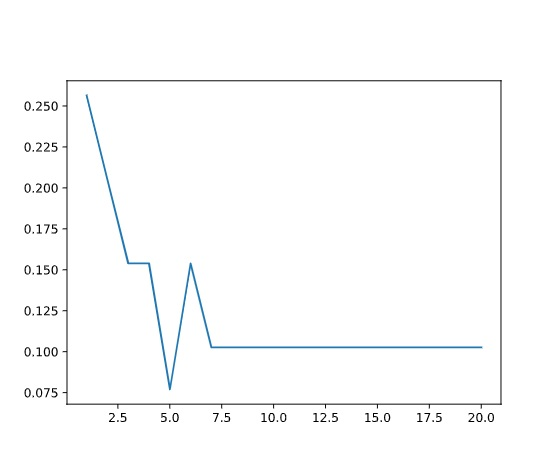

**As we can see the increasing decreases the accuracy and then becomes constant**

**To further improve the accuracy I added another feature "Area" to the training data and then rebuild the tree and the accuracy improved to 43%**

In [ ]:
labels = flags["Landmass"]
data = flags[["Area","Red","Green",'Blue','Gold','White','Black','Orange']]

train_data,test_data,train_labels,test_labels = train_test_split(data,labels,train_size=0.8,test_size=0.2,random_state=1)

tree = DecisionTreeClassifier(random_state=1)

tree.fit(train_data,train_labels)

print(tree.score(test_data,test_labels))
      